In [1]:
# encoding:utf-8

# Author: Marcos Castro
# This file implements graphs

# class that represents the node
class Node:

    def __init__(self, state):
        self.__state, self.__parent = state, None

    def getState(self):
        return self.__state

    def setParent(self, parent):
        self.__parent = parent

    def getParent(self):
        return self.__parent


# class that represents the graph
class Graph:

    def setParent(self, source, destination, cost):
        destination.setParent(source)

    def getStatesPredecessors(self, node):
        predecessors, current_parent = {}, node.getParent()
        while(current_parent):
            predecessors[str(current_parent.getState())] = current_parent.getState()
            current_parent = current_parent.getParent()
        return predecessors

In [2]:
# encoding:utf-8

# This file implements a priority queue using heapq module
# Author: Marcos Castro

import heapq

class PriorityQueue:

    def __init__(self):
        self._queue = []
        self._index = 0

    def insert(self, item, priority):
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1

    def remove(self):
        return heapq.heappop(self._queue)[-1]

    def is_empty(self):
        return len(self._queue) == 0

    def size(self):
        return self._index


# test...
# queue = PriorityQueue()
# queue.insert('e', 9)
# queue.insert('a', 2)
# queue.insert('h', 13)
# queue.insert('e', 5)
# queue.insert('c', 11)
# print(queue.remove())

In [18]:
import random, time
import itertools



# returns a list of tuples where each tuple is (state, cost_edge)
def get_states(state, dict_states_predecessors):
    len_state, states = len(state), []

    for i in range(len_state):
        sub_list = state[0:i + 1]  # gets sublist
        len_sub_list = len(sub_list)  # gets lenght sublist
        # gets tail list
        tail_list = state[i + 1:len_state]
        # realizes the flip
        # remove the top element (first element)
        top_element = sub_list.pop(0)
        # invert "sub_list"
        sub_list = sub_list[::-1]
        # inserts element of top on end of list
        sub_list.append(top_element)
        # concatenates the two lists
        list_state = sub_list + tail_list
        # inserts the "states" and the edge's cost if the state no exists in "dict_states_predecessors"
        if str(list_state) not in dict_states_predecessors:
            states.append((sub_list + tail_list, i + 1))

    if len(states) > 0:
        states.pop(0)  # removes first state that is the same "state"
    return states  # return all states


# runs algorithm
def run(state, time_sleep=1):
    goal_state = state[:]  # copy the goal state
    goal_state.sort()  # ordering goal_state
    graph = Graph()  # creates graph

    # fringe of the graph, fringe is an priority queue, priority is the smaller cost
    fringe = PriorityQueue()

    # append in priority queue, each item is a tuple (node, cumulative_cost)
    fringe.insert((Node(state), 0), 0)

    while not fringe.is_empty():  # while fringe not is empty

        node, cost_node = fringe.remove()  # removes node of the fringe

        if node.getState() == goal_state:  # verifies if reached the goal

            return cost_node

        # expands the node (generates states), each neighbor is a tuple (state, cost_edge)
        neighbors = get_states(node.getState(), graph.getStatesPredecessors(node))

        if neighbors:



            for neighbor in neighbors:
                state_neighbor, cost_edge = neighbor  # unpack tuple (state, cost_edge)
                neighbor_node = Node(state_neighbor)  # creates neighbor node
                graph.setParent(node, neighbor_node, cost_edge)  # set parent
                cumulative_cost = cost_node + 1  # calculates cumulative cost
                fringe.insert((neighbor_node, cumulative_cost), cumulative_cost)  # adds neighbor node on the fringe


if __name__ == "__main__":
    print("Size:")
    size=int(input())
    print("Parameter C:")
    c=int(input())
    lista=[]
    print("List:")
    #for i in range(size):
        #lista.append(input())
    lista = (input()).split()
    permutations=(list(list(itertools.permutations(lista))))
    
    """parameter c
    if the parameter c is 0 writes Pn; 
    if the parameter c is 1 writes Pn and all the permutations (in xls and xml) that require Pn flips ant the corresponding flips;
    if the parameter c is 2 writes Pn and all the permutations (in xls and xml)"""
    
    if(c==0):
        initial_state = lista
        if (initial_state):
            total_cost = run(initial_state, time_sleep=1)
            print('Cantidad de flips: %s\n' % total_cost)

    if(c==1):
        initial_state = lista
        flips_ini = run(initial_state, time_sleep=1)
        print('Cantidad de flips: %s\n' % flips_ini)
        for i in range(len(permutations)):
            total_cost = run(list(permutations[i]), time_sleep=1)
            if(total_cost==flips_ini):
                print (permutations[i])

    if (c == 2):
        initial_state = lista
        flips_ini = run(initial_state, time_sleep=1)
        print('Cantidad de flips: %s\n' % flips_ini)
        for i in range(len(permutations)):
            print (permutations[i])

Size:
4
Parameter C:
1
List:
2 4 3 1
Cantidad de flips: 3

('2', '4', '3', '1')
('2', '1', '4', '3')
('4', '2', '1', '3')
('4', '1', '3', '2')
('3', '2', '4', '1')
('3', '4', '1', '2')
('1', '2', '4', '3')
('1', '4', '2', '3')
('1', '4', '3', '2')
('1', '3', '2', '4')
('1', '3', '4', '2')


# HPTA CHACON DE MIERDA

In [4]:
import xlsxwriter

In [5]:
print(":D")

:D


In [12]:
import xlsxwriter


# Create an new Excel file and add a worksheet.
workbook = xlsxwriter.Workbook('demo.xlsx')
worksheet = workbook.add_worksheet()

# Widen the first column to make the text clearer.
worksheet.set_column('A:A', 20)

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# Write some simple text.
worksheet.write('A1', 'Hello')

# Text with formatting.
worksheet.write('A2', 'World', bold)

# Write some numbers, with row/column notation.
worksheet.write(2, 0, 123)
worksheet.write(3, 0, 123.456)

# Insert an image.
#worksheet.insert_image('B5', 'logo.png')

workbook.close()

In [18]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "demo.xlsx"):
    csv = df
    html = '<a download="{filename}" href="data:text/csv;" target="_blank">{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

df = pd.DataFrame(data = [[1,2],[3,4]], columns=['Col 1', 'Col 2'])
create_download_link(workbook)

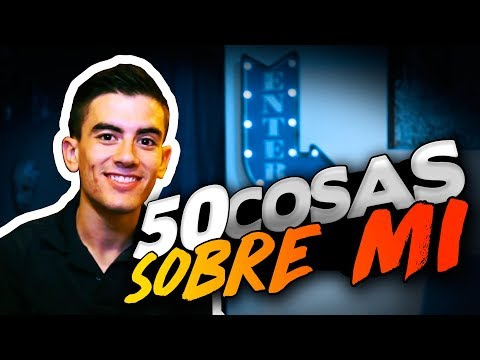

In [21]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
vid = YouTubeVideo('35JTe3RibRE')
display(vid)

In [23]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/35JTe3RibRE?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

Usando Markdown: $F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx$

Usando IPython.display:

In [24]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>